## Yessica Alejandra Gomez Rivera / Procesamiento Digital de Imagenes 
# Cesar German Castellanos 


## Unsupervised Learning Techniques

## Clustering

**Ejemplo:** Consideremos el conjunto de datos [*iris dataset*](https://en.wikipedia.org/wiki/Iris_flower_data_set), donde la especie de cada instancia (es decir, su clase) se representa con un marcador diferente:

In [ ]:
#-------------------------------------------------------------------------------
# importamos base de datos iris y soporte gráfico-------------------------------
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
#-------------------------------------------------------------------------------
# cargamos datos----------------------------------------------------------------
data = load_iris()
X    = data.data                   # datos
y    = data.target                 # etiquetas
print('Dimensión de X:',X.shape)
print('Dimensión de y:',y.shape)
#-------------------------------------------------------------------------------
# identificamos los nombres de las etiquetas
print('Labels:')
data.target_names
#-------------------------------------------------------------------------------

Dimensión de X: (150, 4)
Dimensión de y: (150,)
Labels:


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

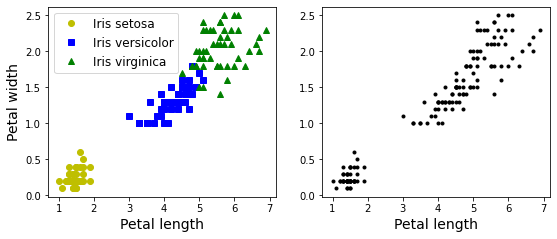

In [ ]:
#-------------------------------------------------------------------------------
# realizamos un análisis exploratorio de los datos------------------------------
# features = [sepal_length, sepal_width, petal_length, petal_width]
#-------------------------------------------------------------------------------
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
#-------------------------------------------------------------------------------
plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
#-------------------------------------------------------------------------------
#save_fig("classification_vs_clustering_plot")
plt.show()
#-------------------------------------------------------------------------------

- **Figura de la izquierda:** Es un conjunto de datos etiquetado, para el cual los algoritmos de clasificación como Regresión logística, SVM o clasificadores de bosque aleatorio son muy adecuados.
- **Figura de la derecha:** Tenemos el mismo conjunto de datos, pero sin las etiquetas, por lo que ya no puede usar un algoritmo de clasificación. Aquí es donde intervienen los algoritmos de agrupación: muchos de ellos pueden detectar fácilmente el grupo inferior izquierdo. También es bastante fácil de ver con nuestros propios ojos, pero no es tan obvio que el grupo superior derecho en realidad esté compuesto por dos subgrupos distintos.

Dicho esto, el conjunto de datos en realidad tiene dos características adicionales (longitud y ancho del sépalo), no representadas aquí, y los algoritmos de agrupación pueden hacer un buen uso de todas las características, por lo que de hecho identifican los tres grupos bastante bien **(por ejemplo, utilizando un modelo de mezcla gaussiana , solo 5 de cada 150 instancias se asignan al clúster incorrecto)**.

In [ ]:
#-------------------------------------------------------------------------------
# Ejemplo de agrupamiento basado en Gaussian Mixture----------------------------
#-------------------------------------------------------------------------------
# importamos módulo de soporte matemático y función GaussianMixture-------------
import numpy as np
from sklearn.mixture import GaussianMixture
#-------------------------------------------------------------------------------
# obtenemos las etiquetas de las muestras X-------------------------------------
y_pred  = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
print('Salida del GM:',y_pred)
mapping = np.array([1, 2, 0])
y_pred  = np.array([mapping[cluster_id] for cluster_id in y_pred])
#-------------------------------------------------------------------------------
# predicted labels
print('y_pred:',y_pred)
#-------------------------------------------------------------------------------

Salida del GM: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
y_pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Graficamos el agrupamiento obtenido usando Mezcla de Gaussiana:

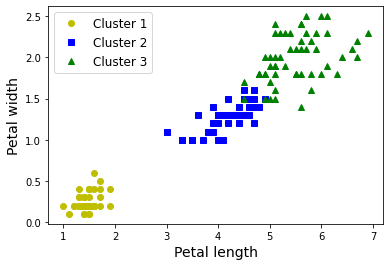

In [ ]:
#-------------------------------------------------------------------------------
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()
#-------------------------------------------------------------------------------

Estimamos el error del clustering:

In [ ]:
#-------------------------------------------------------------------------------
print('La precisión del clustering es:', np.sum(y_pred==y)/len(y_pred)*100, '%')
#-------------------------------------------------------------------------------

La precisión del clustering es: 96.66666666666667 %


**NOTA:** No existe una definición universal de lo que es un *clúster*: realmente depende del contexto, y diferentes algoritmos capturarán diferentes tipos de clústeres. Por ejemplo, algunos algoritmos buscan instancias centradas alrededor de un punto particular, llamado *centroide*. Otros buscan *regiones continuas de instancias densamente empaquetadas*: estos grupos pueden tomar cualquier forma. Algunos algoritmos son jerárquicos y buscan grupos de grupos. 

# K-means

**Ejemplo:** Consideremos un conjunto de datos sin etiqueta representado por $5$ *blobs* de instancias/muestras. Comencemos generando los *blobs*:

In [ ]:
#-------------------------------------------------------------------------------
# importamos función para crear los blobs---------------------------------------
from sklearn.datasets import make_blobs
#-------------------------------------------------------------------------------
# generamos los blobs definiedo los centros primero-----------------------------
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
#-------------------------------------------------------------------------------
# definimos la dispersión de los blobs------------------------------------------
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
# creamos blobs-----------------------------------------------------------------
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)
#-------------------------------------------------------------------------------
print('Dimensión X:', X.shape)
print('Dimensión y:', y.shape)
#-------------------------------------------------------------------------------

Dimensión X: (2000, 2)
Dimensión y: (2000,)


In [ ]:
y

array([4, 2, 0, ..., 3, 0, 2])

Observar histograma de etiquetas

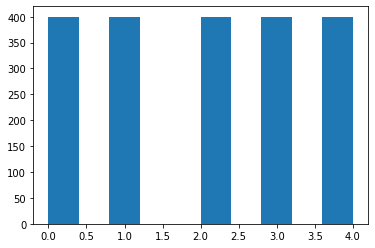

In [ ]:
plt.hist(y)
plt.show()

Ahora observemos los *blobs*:

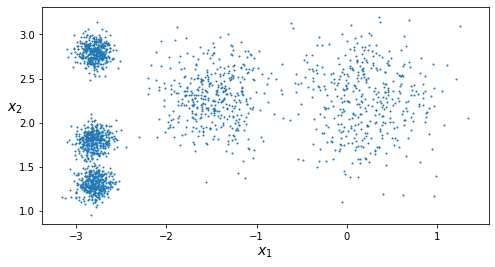

In [ ]:
#-------------------------------------------------------------------------------
# definimos función de ploteado de clusters-------------------------------------
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
#-------------------------------------------------------------------------------    
plt.figure(figsize=(8, 4))
# graficamos blobs--------------------------------------------------------------
plot_clusters(X)        # incluir y
#save_fig("blobs_plot")
plt.show()
#-------------------------------------------------------------------------------

# Fit and Predict

Vamos a entrenar un *clustering K-Means* en este conjunto de datos. **Intentaremos encontrar el centro de cada *blob* y asignar cada instancia al *blob* más cercano**:

y_pred: [4 1 0 ... 3 0 1]


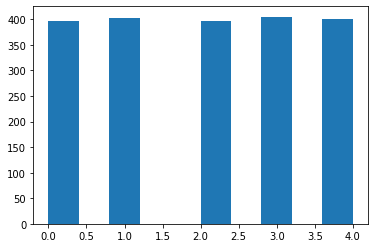

In [ ]:
#-------------------------------------------------------------------------------
# importamos función KMeans-----------------------------------------------------
from sklearn.cluster import KMeans
#-------------------------------------------------------------------------------
# definimos el número de clusters-----------------------------------------------
k      = 5
#-------------------------------------------------------------------------------
# generamos el modelo KMeans----------------------------------------------------
kmeans = KMeans(n_clusters=k, random_state=42)
#-------------------------------------------------------------------------------
# realizamos predicción---------------------------------------------------------
y_pred = kmeans.fit_predict(X)
#-------------------------------------------------------------------------------
print('y_pred:', y_pred)
#-------------------------------------------------------------------------------
plt.hist(y_pred)
plt.show()

- Tengamos en cuenta que debemos especificar el número de clústeres $k$ que debe encontrar el algoritmo. En este ejemplo, es bastante obvio al observar los datos que $k$ debe establecerse en 5, pero en general, no es tan fácil. 

En este caso, cada instancia fue asignada a uno de los 5 grupos. En el contexto de la agrupación, **la etiqueta de una instancia es el índice de la agrupación a la que el algoritmo asigna esta instancia**: esto no debe confundirse con las etiquetas de clase en la clasificación. La instancia de *KMeans* conserva una copia de las etiquetas de las instancias en las que se entrenó, disponible a través de la variable *labels_ instance*:

In [ ]:
#-------------------------------------------------------------------------------
y_pred is kmeans.labels_
#-------------------------------------------------------------------------------

True

También podemos echar un vistazo a los 5 centroides que encontró el algoritmo:

In [ ]:
#-------------------------------------------------------------------------------
print('Coordenadas de los centroides:')
kmeans.cluster_centers_
#-------------------------------------------------------------------------------

Coordenadas de los centroides:


array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

Por supuesto, podemos asignar fácilmente nuevas instancias al clúster cuyo centroide es el más cercano:

In [ ]:
#-------------------------------------------------------------------------------
# definimos un conjunto de samples nuevo----------------------------------------
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
#-------------------------------------------------------------------------------
# hacemos predicción de set de datos nuevo
kmeans.predict(X_new)
#-------------------------------------------------------------------------------

array([0, 0, 3, 3], dtype=int32)

# Decision Boundaries

Tracemos los **límites de decisión del modelo**. Esto nos da un *diagrama de Voronoi*:

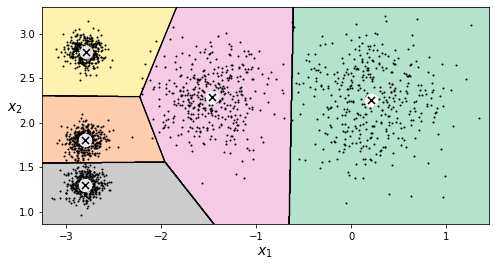

In [ ]:
#-------------------------------------------------------------------------------
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
#-------------------------------------------------------------------------------
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)
#-------------------------------------------------------------------------------
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
#-------------------------------------------------------------------------------
# graficamos vecindarios de decisión--------------------------------------------
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
#save_fig("voronoi_plot")
plt.show()
#-------------------------------------------------------------------------------

- La gran mayoría de las instancias estan claramente asignadas al grupo apropiado,**pero algunas instancias probablemente estaban mal etiquetadas** (especialmente cerca del límite entre el grupo superior izquierdo y el grupo central). 
- De hecho, el algoritmo **K-Means no se comporta muy bien cuando los *blobs* tienen diámetros muy diferentes**, ya que lo único que le importa al asignar una instancia a un clúster es la distancia al centroide.

# Hard Clustering vs Soft Clustering

En lugar de asignar cada instancia a un solo clúster, lo que se denomina *hard clustering*, puede ser útil **asignar a cada instancia una puntuación por agrupación**: esto se denomina *soft clustering*. 

**Ejemplo:** el puntaje puede ser la distancia entre la instancia y el centroide o, por el contrario, puede ser un puntaje de similitud (o afinidad) como la Función de Base Radial Gaussiana. En la clase *KMeans*, el método *transform()* mide la distancia desde cada instancia a cada centroide:

In [ ]:
#-------------------------------------------------------------------------------
# calculamos la distancia de cada sample del set nuevo respecto a cada centroide
kmeans.transform(X_new)
#-------------------------------------------------------------------------------

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

- En este ejemplo, la primera instancia en *X_new* se encuentra a una distancia de **2.81** del segundo centroide, **0.33** del primero centroide, **2.90** del cuarto centroide,**1.49** del tercero centroide y **2.89** del quinto centroide. Si tiene un conjunto de datos de alta dimensión y lo transforma de esta manera, termina con un conjunto de datos $k$-dimensional: esta puede ser una técnica de reducción de dimensionalidad no lineal muy eficiente.

Podemos verificar que esta es realmente la distancia euclidiana entre cada instancia y cada centroide:

In [ ]:
#-------------------------------------------------------------------------------
# calculamos distancias usando distancia euclidea-------------------------------
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)
#-------------------------------------------------------------------------------

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

# K-Means Algorithm

**El algoritmo en acción:**

La clase *KMeans* aplica un algoritmo optimizado por defecto. Para obtener el algoritmo K-Means original (solo con fines educativos), debe establecer *init="random"*, *n_init = 1* and *algorithm="full"*. Estos hiperparámetros se explicarán a continuación.

Ejecutemos el algoritmo K-Means para 1, 2 y 3 iteraciones, para ver **cómo se mueven los centroides**:

In [ ]:
#-------------------------------------------------------------------------------
# generamos los modelos KMeans para 1,2, y 3 iteraciones------------------------
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
#-------------------------------------------------------------------------------
# realizamos el fit()-----------------------------------------------------------
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)
#-------------------------------------------------------------------------------

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

Ahora vamos a trazar esto:

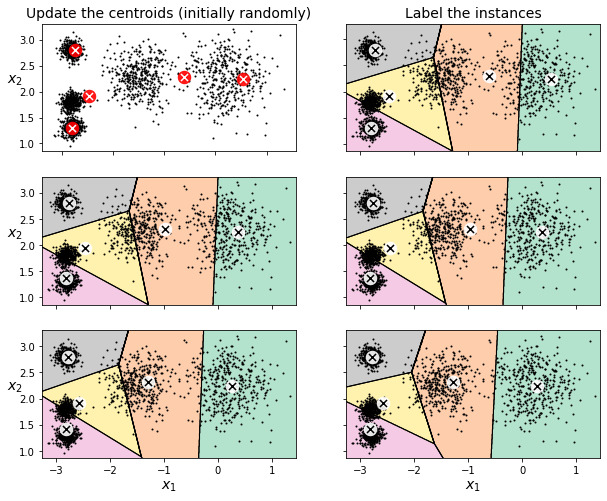

In [ ]:
#-------------------------------------------------------------------------------
plt.figure(figsize=(10, 8))
#-------------------------------------------------------------------------------
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)
#-------------------------------------------------------------------------------
plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)
#-------------------------------------------------------------------------------
plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)
#-------------------------------------------------------------------------------
plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)
#-------------------------------------------------------------------------------
plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)
#-------------------------------------------------------------------------------
plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)
#-------------------------------------------------------------------------------
#save_fig("kmeans_algorithm_plot")
plt.show()
#-------------------------------------------------------------------------------

- Podemos ver el algoritmo en acción en la Figura anterior, los centroides se inicializan aleatoriamente (arriba a la izquierda). 
- Luego las instancias se etiquetan (arriba a la derecha). 
- Luego los centroides se actualizan (centro a la izquierda).
- Seguido, las instancias se vuelven a etiquetar (centro a la derecha ), y así. 

**Como puede ver, en solo 3 iteraciones, el algoritmo ha alcanzado una agrupación que parece casi óptima.**

**NOTA:** La complejidad computacional del algoritmo es generalmente lineal con respecto al número de instancias $m$, el número de clústeres $k$ y el número de dimensiones $n$. Sin embargo, esto solo es cierto cuando los datos tienen una estructura de agrupamiento. Si no es así, entonces, en el peor de los casos, la complejidad puede aumentar exponencialmente con el número de instancias. 

# K-Means variability

**Ejemplo:** la siguiente Figura muestra dos soluciones subóptimas con las que el algoritmo puede converger si no tiene suerte con el paso de inicialización aleatoria:

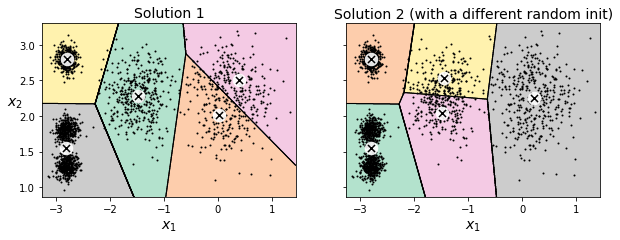

In [ ]:
#-------------------------------------------------------------------------------
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)
    plt.figure(figsize=(10, 3.2))
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)
#-------------------------------------------------------------------------------
# probamos con diferentes semillas de inicialización----------------------------
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=25)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=29)
plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")
#save_fig("kmeans_variability_plot")
plt.show()
#-------------------------------------------------------------------------------

Veamos algunas formas en que puede mitigar este riesgo mejorando la inicialización del centroide.

# Centroid initialization methods

Si sabemos aproximadamente dónde deberían estar los centroides (por ejemplo, si ejecutó otro algoritmo de agrupación anteriormente), puede establecer el hiperparámetro *init* en una matriz NumPy que contiene la lista de centroides y establecer *n_init* en 1:

In [ ]:
#-------------------------------------------------------------------------------
# incializamos con las posiciones de los centroides-----------------------------
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans    = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
#-------------------------------------------------------------------------------

KMeans(algorithm='auto', copy_x=True,
       init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       max_iter=300, n_clusters=5, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=42, tol=0.0001, verbose=0)

Otra solución es **ejecutar el algoritmo varias veces con diferentes inicializaciones aleatorias y mantener la mejor solución**. Esto se controla mediante el hiperparámetro *n_init*: de forma predeterminada, es igual a 10, lo que significa que todo el algoritmo descrito anteriormente se ejecuta 10 veces cuando se llama a *fit()*, y Scikit-Learn mantiene la mejor solución.

Pero, **¿cómo sabe exactamente qué solución es la mejor?**. Bueno, por supuesto, utiliza una métrica de rendimiento! Se llama la *inercia del modelo*: esta es la distancia cuadrática media entre cada instancia y su centroide más cercano.

In [ ]:
#-------------------------------------------------------------------------------
# estimamos la inercia del modelo-----------------------------------------------
kmeans.inertia_
#-------------------------------------------------------------------------------

211.5985372581684

El método *score()* devuelve la inercia negativa. ¿Por qué negativo? Bueno, es **porque el método de *score()* de un predictor siempre debe respetar la regla "great is better"**.

In [ ]:
#-------------------------------------------------------------------------------
# estimamos el score del modelo junto con los datos-----------------------------
kmeans.score(X)
#-------------------------------------------------------------------------------

-211.59853725816856

# Multiple initializations

Entonces, un enfoque para resolver el problema de la variabilidad es **simplemente ejecutar el algoritmo K-Means varias veces con diferentes inicializaciones aleatorias y seleccionar la solución que minimice la inercia**. 

**Ejemplo:** tenemos las inercias de los dos modelos *"malos"* que se muestran en la figura anterior:

In [ ]:
#-------------------------------------------------------------------------------
# inercia del modelo con semilla=11----------------------------------------------
kmeans_rnd_init1.inertia_
#-------------------------------------------------------------------------------

223.29108572819035

In [ ]:
#-------------------------------------------------------------------------------
# inercia del modelo con semilla=19---------------------------------------------
kmeans_rnd_init2.inertia_
#-------------------------------------------------------------------------------

238.7573747601757

Como podemos ver, La inercia cambia, lo que significa que probablemente el algoritmo no funcione bien. Cuando configuramos el hiperparámetro *n_init*, Scikit-Learn ejecuta el algoritmo original *n_init* veces y selecciona la solución que minimiza la inercia. Por defecto, Scikit-Learn establece *n_init = 10*.

In [ ]:
#-------------------------------------------------------------------------------
# definimos un KMeans con 10 inciaciones dif------------------------------------
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)
#-------------------------------------------------------------------------------

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=11,
       tol=0.0001, verbose=0)

Como podemos ver, terminamos con el modelo inicial, que sin duda es la solución óptima de K-Means (al menos en términos de inercia, y suponiendo que $k=5$).

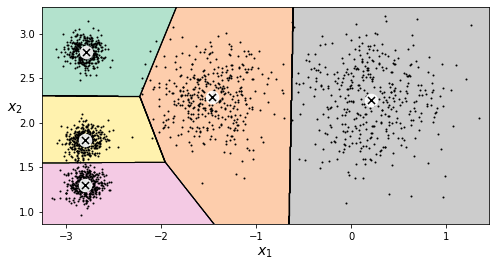

In [ ]:
#-------------------------------------------------------------------------------
# graficamos modelo óptimo------------------------------------------------------
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()
#-------------------------------------------------------------------------------

In [ ]:
kmeans_rnd_10_inits.inertia_

211.59853725816822

# K-Means++

Para establecer la inicialización en K-Means ++, simplemente configure *init="k-means ++"* (esto es realmente el valor predeterminado):

In [ ]:
#-------------------------------------------------------------------------------
# observemos los parámetros definidos por default-------------------------------
KMeans()
#-------------------------------------------------------------------------------

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Accelerated K-Means

Para usar la variante de K-Means de [**Elkan**](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf), simplemente configure *algorithm = "elkan"*. Tenga en cuenta que no admite datos dispersos, por lo que, de forma predeterminada, Scikit-Learn usa "*elkan*" para datos densos y "*full*" (el algoritmo K-Means normal) para datos dispersos.

In [ ]:
#-------------------------------------------------------------------------------
%timeit -n 50 KMeans(algorithm="elkan").fit(X)
#-------------------------------------------------------------------------------

50 loops, best of 5: 90.1 ms per loop


In [ ]:
#-------------------------------------------------------------------------------
%timeit -n 50 KMeans(algorithm="full").fit(X)
#-------------------------------------------------------------------------------

50 loops, best of 5: 124 ms per loop


# Mini-Batch K-Means

Scikit Learn implementa este algoritmo en la clase *MiniBatchKMeans*. Puede usar esta clase como la clase *KMeans*:

In [ ]:
#-------------------------------------------------------------------------------
# importamos la función para le MiniBatch---------------------------------------
from sklearn.cluster import MiniBatchKMeans
#-------------------------------------------------------------------------------
# definimos el modelo y aplicamos a los datos-----------------------------------
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)
#-------------------------------------------------------------------------------

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [ ]:
#-------------------------------------------------------------------------------
# calculamos la inercia del modelo con MiniBatch--------------------------------
minibatch_kmeans.inertia_
#-------------------------------------------------------------------------------

211.93186531476775

Si el conjunto de datos no cabe en la memoria, la opción más simple es usar la clase *memmap*, tal como lo hicimos para PCA incremental. 

**Ejemplo:** Primero carguemos la base de datos de dígitos escritos a mano MNIST:

In [ ]:
#-------------------------------------------------------------------------------
# importamos módulos de soporte-------------------------------------------------
import urllib
import os
from sklearn.datasets import fetch_openml
#-------------------------------------------------------------------------------
# cargamos base de datos MNIST--------------------------------------------------
mnist        = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)
#-------------------------------------------------------------------------------
# importamos función para partición de datos------------------------------------
from sklearn.model_selection import train_test_split
#-------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)
#-------------------------------------------------------------------------------
print('Train dimensions:', X_train.shape, y_train.shape)
print('Test dimensions:', X_test.shape, y_test.shape)
#-------------------------------------------------------------------------------

Train dimensions: (52500, 784) (52500,)
Test dimensions: (17500, 784) (17500,)


A continuación, escribámoslo en un *memmap*:

In [ ]:
#-------------------------------------------------------------------------------
# importar funciones del memmap()-----------------------------------------------
from tempfile import mkdtemp
import os.path as path
#-------------------------------------------------------------------------------
# cargamos los datos al modelo--------------------------------------------------
filename = path.join(mkdtemp(), 'my_mnist.data')
X_mm     = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:]  = X_train
#-------------------------------------------------------------------------------
# aplicamos el minibatch KMeans-------------------------------------------------
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)
#-------------------------------------------------------------------------------

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

Si nuestros datos son tan grandes que no puede usar *memmap*, las cosas se vuelven más complicadas. Comencemos escribiendo una función para cargar el próximo lote (en la vida real, cargaría los datos del disco):

In [ ]:
#-------------------------------------------------------------------------------
# definimos función de carga del siguiente batch--------------------------------
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]
#-------------------------------------------------------------------------------

Ahora podemos entrenar al modelo al alimentarlo un batch a la vez. También necesitamos implementar múltiples inicializaciones y mantener el modelo con la menor inercia:

In [ ]:
#-------------------------------------------------------------------------------
# definimos semilla aleatoria---------------------------------------------------
np.random.seed(42)
#-------------------------------------------------------------------------------
# definimos parámetros inciales-------------------------------------------------
k                        = 5
n_init                   = 10
n_iterations             = 50
batch_size               = 100
init_size                = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10
best_kmeans              = None
#-------------------------------------------------------------------------------
# loop sobre las n_init---------------------------------------------------------
for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans
#-------------------------------------------------------------------------------
best_kmeans.score(X)
#-------------------------------------------------------------------------------

-223.4578038766804

Mini-batch K-Means es mucho más rápido que los K-Means normales:

In [ ]:
#-------------------------------------------------------------------------------
%timeit KMeans(n_clusters=5).fit(X)
#-------------------------------------------------------------------------------

10 loops, best of 5: 50.1 ms per loop


In [ ]:
#-------------------------------------------------------------------------------
%timeit MiniBatchKMeans(n_clusters=5).fit(X)
#-------------------------------------------------------------------------------

10 loops, best of 5: 27 ms per loop


**¡Eso es mucho más rápido!** Sin embargo, su rendimiento es a menudo más bajo (mayor inercia), y se sigue degradando a medida que aumenta $k$. Tracemos la relación de inercia y la relación de tiempo de entrenamiento entre K-Means Mini-batch y K-Means regulares:

In [ ]:
#-------------------------------------------------------------------------------
# importamos función para grabar tiempos
#-------------------------------------------------------------------------------
from timeit import timeit
#-------------------------------------------------------------------------------
times    = np.empty((50, 2))
inertias = np.empty((50, 2))
#-------------------------------------------------------------------------------
# loopp across 50 iteraciones--------------------------------------------------
for k in range(1, 51):
    kmeans_          = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 50), end="")
    # almacenamos tiempos
    times[k-1, 0]    = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]    = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    # almacenamos inercias
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_
#-------------------------------------------------------------------------------

50/50

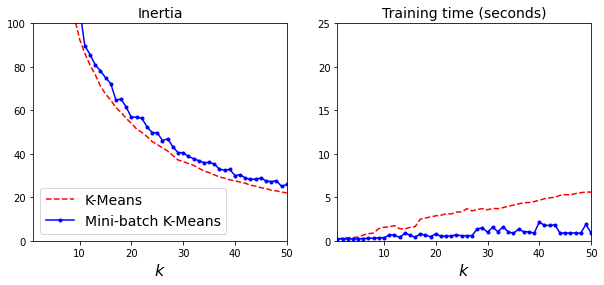

In [ ]:
#-------------------------------------------------------------------------------
# graficamos tiempos e inercias sobre las iteraciones---------------------------
plt.figure(figsize=(10,4))
#-------------------------------------------------------------------------------
plt.subplot(121)
plt.plot(range(1, 51), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 51), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 50, 0, 100])
#-------------------------------------------------------------------------------
plt.subplot(122)
plt.plot(range(1, 51), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 51), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 50, 0, 25])
#-------------------------------------------------------------------------------
#save_fig("minibatch_kmeans_vs_kmeans")
plt.show()
#-------------------------------------------------------------------------------

Podemos ver esto en la Figura: 
- La gráfica de la izquierda compara las inercias de los K-Means de Mini-lote y los modelos K-Means regulares entrenados en el conjunto de datos anterior usando varios números de grupos $k$. La diferencia entre las dos curvas permanece bastante constante, pero esta diferencia se vuelve cada vez más significativa a medida que aumenta k, ya que la inercia se hace cada vez más pequeña. 
- Sin embargo, en la gráfica de la derecha, puede ver que K-Means de Mini-batch es mucho más rápido que los K-Means normales, y esta diferencia aumenta con $k$.

# Finding the Optimal Number of Clusters

**Ejemplo:** como podemos ver a continuación, establecer $k$ en 3 u 8 da como resultado modelos bastante malos:

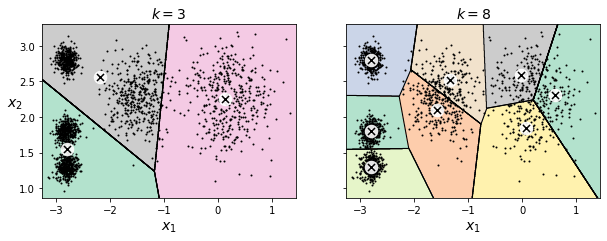

In [ ]:
#-------------------------------------------------------------------------------
# definimos model Kmeans para 3 y 8 clusters------------------------------------
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)
#-------------------------------------------------------------------------------
plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
#save_fig("bad_n_clusters_plot")
plt.show()
#-------------------------------------------------------------------------------

In [ ]:
# calcular inercias-------------------------------------------------------------
# code here!
#-------------------------------------------------------------------------------

In [ ]:
kmeans_k3.inertia_

653.2167190021553

In [ ]:
kmeans_k8.inertia_

118.41983763508077

**TIP:** Quizás estemos pensando que podríamos **elegir el modelo con la menor inercia**. 

**Respuesta:** Lamentablemente, no es tan simple. La inercia para $k = 3$ es 653.2, que es mucho más alta que para $k = 5$ (que era 211.6), pero con $k = 8$, la inercia es solo 119.1. La inercia no es una buena medida de rendimiento cuando se trata de elegir $k$, ya que sigue disminuyendo a medida que aumentamos $k$. De hecho, cuantos más grupos haya, más cerca estará cada instancia de su centroide más cercano y, por lo tanto, menor será la inercia. 

Tracemos la inercia como una función de $k$:

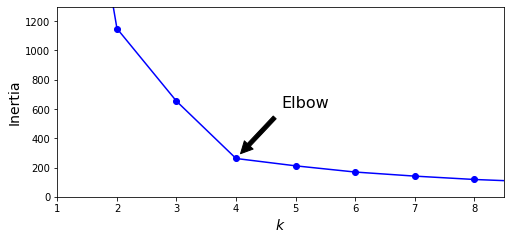

In [ ]:
#-------------------------------------------------------------------------------
# estimamos inercia x cada k----------------------------------------------------
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias     = [model.inertia_ for model in kmeans_per_k]
#-------------------------------------------------------------------------------
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
#save_fig("inertia_vs_k_plot")
plt.show()
#-------------------------------------------------------------------------------

- Como podemos ver, la inercia cae muy rápidamente a medida que aumentamos $k$ hasta 4, pero luego disminuye mucho más lentamente a medida que seguimos aumentando $k$. 
- Esta curva tiene aproximadamente la forma de un brazo, y hay un "*codo*" en $k = 4$, por lo que si no lo supiéramos mejor, sería una buena opción: cualquier valor más bajo sería dramático, mientras que cualquier valor más alto no ayudaría mucho. 

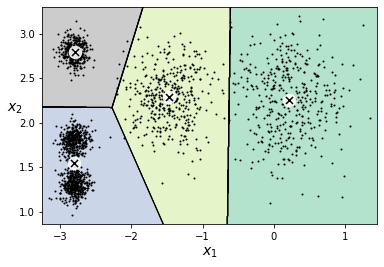

In [ ]:
#-------------------------------------------------------------------------------
# observamos vecindarios de decisión usando K=4---------------------------------
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()
#-------------------------------------------------------------------------------

Para calcular el *silhouette score*, puede usar la función *silhouette_score()* de Scikit-Learn, dándole todas las instancias en el conjunto de datos y las etiquetas que se les asignaron.

Tracemos la puntuación de la silueta en función de $k$:

In [ ]:
#-------------------------------------------------------------------------------
# importamos funciones para calcular silhouette_score---------------------------
from sklearn.metrics import silhouette_score
#-------------------------------------------------------------------------------
silhouette_score(X, kmeans.labels_)
#-------------------------------------------------------------------------------

0.655517642572828

In [ ]:
kmeans.labels_

array([2, 1, 4, ..., 0, 4, 1], dtype=int32)

Comparemos los puntajes de silueta para diferentes números de grupos:

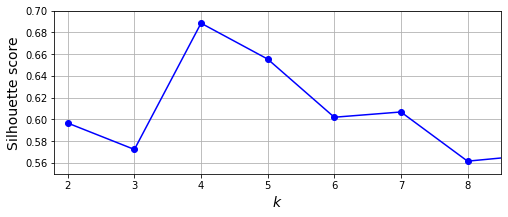

In [ ]:
#-------------------------------------------------------------------------------
# analizamos el score para diferentes clusters----------------------------------
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
#-------------------------------------------------------------------------------
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
#save_fig("silhouette_score_vs_k_plot")
plt.show()
#-------------------------------------------------------------------------------

Como podemos ver, esta visualización es mucho más rica que la anterior: en particular, aunque **confirma que $k = 4$ es una muy buena opción, también subraya el hecho de que $k = 5$ también es bastante bueno y mucho mejor que $k = 6$ o $k = 7$**. Esto no era visible al comparar inercias.

Adicionalmente, obtenemos una visualización aún más informativa cuando trazamos el *silhouette score* de cada instancia, ordenado por el grupo al que están asignados y por el valor del coeficiente. Esto se llama **diagrama de silueta**:

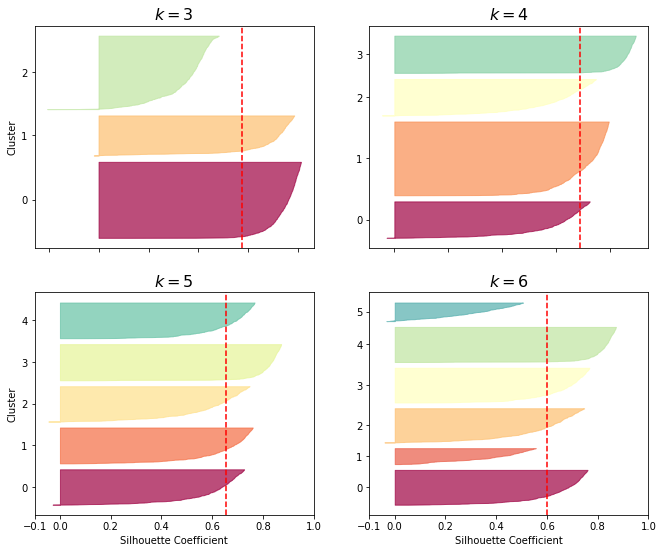

In [ ]:
#-------------------------------------------------------------------------------
# importamos módulos de soporte-------------------------------------------------
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
#-------------------------------------------------------------------------------
plt.figure(figsize=(11, 9))
#-------------------------------------------------------------------------------
# loop para diferentes valores de k---------------------------------------------
for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred                  = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos     = padding
    ticks   = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
#-------------------------------------------------------------------------------
#save_fig("silhouette_analysis_plot")
plt.show()
#-------------------------------------------------------------------------------

- Las líneas discontinuas verticales representan el *silhouette score* para cada  grupos. 
- Cuando la mayoría de las instancias en un grupo tienen un coeficiente más bajo que este puntaje (es decir, si muchas de las instancias se detienen cerca de la línea punteada, terminando a la izquierda de la misma), entonces **el grupo es bastante malo ya que esto significa que sus instancias son demasiado cerca de otros grupos**. 
- Podemos ver que cuando $k = 3$ y cuando $k = 6$, obtenemos grupos defectuosos. Pero cuando $k = 4$ o $k = 5$, los grupos se ven bastante bien: **la mayoría de los casos se extienden más allá de la línea discontinua, a la derecha y más cerca de 1.0**.
- Cuando $k = 4$, el grupo en el índice 1 (el tercero desde la parte superior), es bastante grande, mientras que cuando $k = 5$, todos los grupos tienen tamaños similares, por lo que a pesar de que la puntuación de silueta general de $k = 4$ es ligeramente mayor que para $k = 5$, parece una buena idea usar $k = 5$ para obtener **grupos de tamaños similares**.

# Limits of K-Means

**Ejemplo:** la Figura a continuación muestra cómo KMeans agrupa un conjunto de datos que contiene tres grupos elipsoidales de diferentes dimensiones, densidades y orientaciones:

Data dimension: (1250, 2) (1250,)


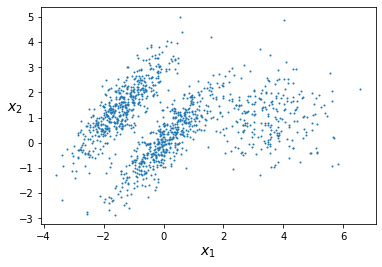

In [ ]:
#-------------------------------------------------------------------------------
# generamos los 3 grupos elipsoidales-------------------------------------------
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1     = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2     = X2 + [6, -8]
X      = np.r_[X1, X2]
y      = np.r_[y1, y2]
#-------------------------------------------------------------------------------
plot_clusters(X)
#-------------------------------------------------------------------------------
print('Data dimension:', X.shape, y.shape)
#-------------------------------------------------------------------------------

In [ ]:
#-------------------------------------------------------------------------------
# definimos 2 modelos KMeans: 1 bueno, 1 malo------------------------------------------
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad  = KMeans(n_clusters=3, random_state=42)
#-------------------------------------------------------------------------------
# aplicamos el modelo a nuestros datos------------------------------------------
kmeans_good.fit(X)
kmeans_bad.fit(X)
#------------------------------------------------------------------------------

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

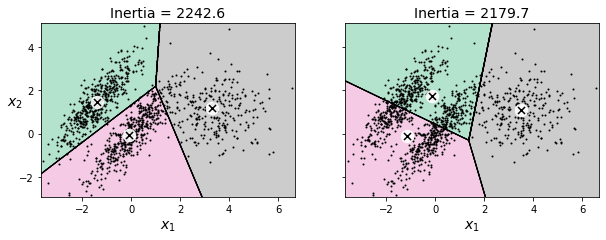

In [ ]:
#-------------------------------------------------------------------------------
# graficamos los vecindarios de decisión----------------------------------------
plt.figure(figsize=(10, 3.2))
#-------------------------------------------------------------------------------
plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)
#-------------------------------------------------------------------------------
plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)
#-------------------------------------------------------------------------------
#save_fig("bad_kmeans_plot")
plt.show()
#------------------------------------------------------------------------------

Como podemos ver, **ninguna de estas soluciones es buena**. 

- La solución a la izquierda es mejor, pero aún corta el $25\%$ del grupo intermedio y lo asigna al grupo a la derecha. 
- La solución a la derecha es simplemente terrible, a pesar de que su inercia es menor. 

Entonces, dependiendo de los datos, los diferentes algoritmos de agrupación pueden funcionar mejor. Por ejemplo, en estos tipos de grupos elípticos, los **modelos de mezcla gaussiana** funcionan muy bien.

**TIP:** Es importante **escalar las características de entrada antes de ejecutar K-Means**, de lo contrario, los grupos pueden estar muy extendidos y K-Means funcionará mal. Escalar las características no garantiza que todos los clústeres sean agradables y esféricos, pero generalmente mejora las cosas.

# Application #1: Using clustering for image segmentation

In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1MC2kDT86owiYpMvtPXQYX2bKie6o1bV0"})   # replace the id with id of file you want to access
downloaded.GetContentFile('ladybug.png')

Aquí, vamos a hacer algo mucho más simple: **segmentación de color**. Simplemente asignaremos píxeles al mismo segmento si tienen un color similar. Primero, carguemos la imagen usando la función *imread()* de Matplotlib:

Dimensión imágen: (214, 324, 3)


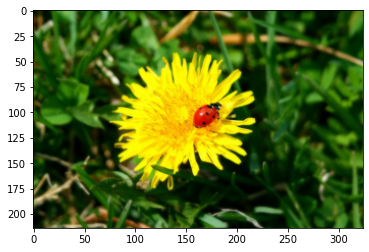

In [ ]:
#-------------------------------------------------------------------------------
# importamos función de lectura de imágen---------------------------------------
from matplotlib.image import imread
#-------------------------------------------------------------------------------
# cargamos imágen---------------------------------------------------------------
image = imread(os.path.join("ladybug.png"))
plt.imshow(image)
print('Dimensión imágen:',image.shape)
#-------------------------------------------------------------------------------

- La imagen se representa como una **matriz 3D**: el tamaño de la primera dimensión es la altura, el segundo es el ancho y el tercero es el número de canales de color, en este caso rojo, verde y azul (RGB). En otras palabras, para cada píxel hay un vector 3D que contiene las intensidades de rojo, verde y azul, cada una entre 0.0 y 1.0 (o entre 0 y 255 si usa *imageio.imread ()*). 
- Algunas imágenes pueden tener menos canales, como imágenes en escala de grises (un canal), o más canales, como imágenes con un canal alfa adicional para transparencia, o imágenes de satélite que a menudo contienen canales para muchas frecuencias de luz (por ejemplo, infrarrojos). 

El siguiente código da nueva forma a la matriz para obtener una larga lista de colores RGB, luego agrupa estos colores usando K-Means. 

**Ejemplo:**
1. Identificar un grupo de colores para todos los tonos de verde. 
2. A continuación, para cada color (por ejemplo, verde oscuro), busca el color medio del grupo de colores del píxel. Por ejemplo, todos los tonos de verde pueden reemplazarse con el mismo color verde claro (suponiendo que el color medio del grupo verde sea verde claro). 
3. Finalmente, dar nueva forma a esta larga lista de colores para obtener la misma forma que la imagen original. ¡Y hemos terminado!.

New data dimension: (69336, 3)
(69336, 3)


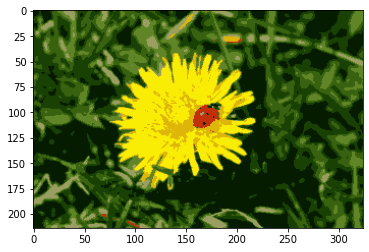

In [ ]:
#-------------------------------------------------------------------------------
# hacemos un reshape a nuestros datos-------------------------------------------
X             = image.reshape(-1, 3) # dejamos la dimensión de canales
print('New data dimension:', X.shape) 
#-------------------------------------------------------------------------------
# aplicamos el método KMeans----------------------------------------------------
kmeans        = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
print(segmented_img.shape)
#-------------------------------------------------------------------------------
# reconstruimos a las dimensiones originales------------------------------------
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img)
#--------------------------------------------------------------------------------

Podemos experimentar con varios números de grupos, como se muestra en la siguiente figura. 

In [ ]:
#-------------------------------------------------------------------------------
# probamos la segmentación para diferentes número de clusters-------------------
segmented_imgs = []
n_colors       = (10, 8, 6, 4, 2)
#-------------------------------------------------------------------------------
for n_clusters in n_colors:
    kmeans        = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))
#-------------------------------------------------------------------------------
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')
#-------------------------------------------------------------------------------
for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
#-------------------------------------------------------------------------------
#save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()
#--------------------------------------------------------------------------------

- Cuando usamos menos de 8 grupos, observamos que el llamativo color rojo de la mariquita no consigue un grupo propio: se fusiona con los colores del entorno. Esto se debe al hecho de que la mariquita es bastante pequeña, mucho más pequeña que el resto de la imagen, por lo que a pesar de que su color es llamativo, K-Means no puede dedicarle un grupo: como se mencionó anteriormente, **K-Means prefiere grupos de tamaños similares**.

# Application #2: Using clustering for preprocessing

Clustering puede ser un enfoque eficiente para la reducción de la dimensionalidad, en particular **como un paso de preprocesamiento antes de un algoritmo de aprendizaje supervisado**. 

**Ejemplo:** Abordemos el conjunto de datos de dígitos, que es un conjunto de datos simple similar a MNIST que contiene 1.797 imágenes en escala de grises $8\times 8$ que representan dígitos del 0 al 9. Primero, carguemos el conjunto de datos:

In [ ]:
#-------------------------------------------------------------------------------
# importamos función de generación de dígitos-----------------------------------
from sklearn.datasets import load_digits
#-------------------------------------------------------------------------------
# cargamos dígitos--------------------------------------------------------------
X_digits, y_digits = load_digits(return_X_y=True)
#-------------------------------------------------------------------------------
print('Dimensiones de los datos:',X_digits.shape,y_digits.shape)
#-------------------------------------------------------------------------------

In [ ]:
imag_prueba = np.reshape(X_digits[50,:],(8,8))
print(imag_prueba.shape)
nueva_imagen = (imag_prueba - imag_prueba.min())/(imag_prueba.max()-imag_prueba.min()) 
plt.imshow(nueva_imagen,cmap='gray')
plt.colorbar()

Ahora, dividámoslo en un conjunto de entrenamiento y un conjunto de prueba:

In [ ]:
#-------------------------------------------------------------------------------
# importamos función para crear partición---------------------------------------
from sklearn.model_selection import train_test_split
#-------------------------------------------------------------------------------
# particionamos los datos en train/test-----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)
#-------------------------------------------------------------------------------
print('Dimensiones de train:',X_train.shape,y_train.shape)
print('Dimensiones de test:',X_test.shape,y_test.shape)
#-------------------------------------------------------------------------------

A continuación, ajustemos un modelo de **Regresión logística**:

In [ ]:
#-------------------------------------------------------------------------------
# importamos función de regresión logística-------------------------------------
from sklearn.linear_model import LogisticRegression
#-------------------------------------------------------------------------------
# definimos modelo de regresión-------------------------------------------------
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
#-------------------------------------------------------------------------------
# aplicamos modelo a los datos de train-----------------------------------------
log_reg.fit(X_train, y_train)
#-------------------------------------------------------------------------------

Vamos a evaluar su precisión en el conjunto de prueba:

In [ ]:
#-------------------------------------------------------------------------------
# evaluamos modelo en datos de test---------------------------------------------
print('Acierto de test:',log_reg.score(X_test, y_test)*100,'%')
#-------------------------------------------------------------------------------

Bien, esa es nuestra línea de base: **96.8% de precisión**. Veamos si podemos mejorar utilizando KMeans como un paso de preprocesamiento. Crearemos un *pipeline* que:
1. Primero agrupará el conjunto de entrenamiento en 50 grupos
2. Luego, reemplazaremos las imágenes con sus distancias a estos 50 grupos
3. Por último, aplicaremos un modelo de regresión logística.

**NOTA:** Aunque es tentador definir el número de grupos a 10, dado que hay 10 dígitos diferentes, es poco probable que funcione bien, porque **hay varias formas diferentes de escribir cada dígito**.

In [ ]:
#-------------------------------------------------------------------------------
# importamos función pipeline---------------------------------------------------
from sklearn.pipeline import Pipeline
#-------------------------------------------------------------------------------
# definimos pasos del pipeline--------------------------------------------------
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
#-------------------------------------------------------------------------------
# aplicamos pipeline a los datos de train---------------------------------------
pipeline.fit(X_train, y_train)
#-------------------------------------------------------------------------------

Ahora vamos a evaluar esta tubería de clasificación:

In [ ]:
#-------------------------------------------------------------------------------
print('Nuevo acierto de test:',pipeline.score(X_test, y_test)*100,'%')
#-------------------------------------------------------------------------------

In [ ]:
#-------------------------------------------------------------------------------
# calculamos tasa de error------------------------------------------------------
te = 1 - (1 - 0.98) / (1 - 0.968)
print('Cambio de tasa de error:', te*100, '%')
#-------------------------------------------------------------------------------

¿Qué hay sobre eso? ¡Redujimos la tasa de error en más del 37%! 
- Sin embargo, elegimos el número de clústeres $k$ completamente arbitrariamente, seguramente podemos hacerlo mejor. 
- Dado que K-Means es solo un paso de preprocesamiento en el *pipeline* de clasificación, encontrar un buen valor para $k$ es mucho más simple que antes: no es necesario realizar un análisis de silueta o minimizar la inercia, el mejor valor de $k$ es simplemente el uno que resulte en el mejor rendimiento de clasificación.
Usemos *GridSearchCV* para encontrar la cantidad óptima de clústeres:

In [ ]:
#-------------------------------------------------------------------------------
# importamos función para búsqueda en grilla------------------------------------
from sklearn.model_selection import GridSearchCV
#-------------------------------------------------------------------------------
# creamos diccionario de posibles n_clusters------------------------------------
param_grid = dict(kmeans__n_clusters=range(2, 50))
#-------------------------------------------------------------------------------
# definimos el nuevo GridSearch---------------------------------------------------
grid_clf   = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
#-------------------------------------------------------------------------------
# aplicamos el pipeline a los datos de train------------------------------------
grid_clf.fit(X_train, y_train)
#-------------------------------------------------------------------------------

Veamos el mejor valor para $k$ y el rendimiento del *pipeline* resultante:

In [ ]:
#-------------------------------------------------------------------------------
# observemos los mejores parámetros---------------------------------------------
grid_clf.best_params_
#-------------------------------------------------------------------------------

{'kmeans__n_clusters': 40}

In [ ]:
#-------------------------------------------------------------------------------
print('Acierto de test usando GridSearch:',grid_clf.score(X_test, y_test)*100,'%')
#-------------------------------------------------------------------------------

Acierto de test usando GridSearch: 97.33333333333334 %


Con $k = 40$ grupos, obtenemos una precisión un poco menor, alcanzando un 97,3% de precisión en el conjunto de prueba. ¡Bueno!

## Application #3: Using clustering for semi-supervised learning

Otro caso de uso para clustering es en el aprendizaje semi-supervisado **cuando tenemos muchas instancias sin etiquetar y muy pocas instancias etiquetadas**. Vamos a entrenar un modelo de regresión logística en una muestra de 50 instancias etiquetadas del conjunto de datos de dígitos:

In [ ]:
#-------------------------------------------------------------------------------
# definimos el número de muestras etiquetadas-----------------------------------
n_labeled = 50
#-------------------------------------------------------------------------------
# definimos el modelo de regression---------------------------------------------
log_reg   = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
# aplicamos el módelo a sólo las primera 50 muestras etiquetadas----------------
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
#-------------------------------------------------------------------------------

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

¿Cuál es el rendimiento de este modelo en el conjunto de prueba?

In [ ]:
#-------------------------------------------------------------------------------
print('Acierto de test para semi-supervisado:',log_reg.score(X_test, y_test)*100,'%')
#-------------------------------------------------------------------------------

Acierto de test para semi-supervisado: 83.33333333333334 %


- La precisión es solo del $83.3\%$: no debería sorprendernos que esto sea mucho más bajo que antes cuando entrenamos el modelo en el conjunto de entrenamiento completo. 
- Veamos cómo podemos hacerlo mejor:
    1. Agrupemos el conjunto de entrenamiento en 50 grupos
    2. Para cada grupo, busquemos la imagen más cercana al centroide. Llamaremos a estas imágenes imágenes representativas:

In [ ]:
#-------------------------------------------------------------------------------
# estimemos las 50 imágenes representativas-------------------------------------
k                        = 50
kmeans                   = KMeans(n_clusters=k, random_state=42)
X_digits_dist            = kmeans.fit_transform(X_train)
print(X_digits_dist.shape)
#-------------------------------------------------------------------------------
# escogemos la muestra con la menor distancia respecto a cada cluster-----------
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
print('Las muestras representativas son:',representative_digit_idx,representative_digit_idx.shape)
X_representative_digits  = X_train[representative_digit_idx]
#-------------------------------------------------------------------------------

(1347, 50)
Las muestras representativas son: [1022 1312  535  817  704   74  175  407  753  589  841  194  702  737
  598  481   50  937  114  159 1056  891  577 1005  731  256 1311  205
   73 1267 1290  325 1343  357   26  559  159  137 1057 1194 1235  648
  525  715  795  771  498 1050  855  151] (50,)


Ahora tracemos estas imágenes representativas y rotúlemoslas manualmente:

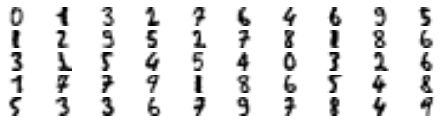

In [ ]:
#-------------------------------------------------------------------------------
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
#-------------------------------------------------------------------------------
#save_fig("representative_images_diagram", tight_layout=False)
plt.show()
#-------------------------------------------------------------------------------

In [ ]:
#-------------------------------------------------------------------------------
# realizamos el rotulado de las imágenes representativas------------------------
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])
#-------------------------------------------------------------------------------

Ahora tenemos un conjunto de datos con solo 50 instancias etiquetadas, pero en lugar de ser instancias completamente aleatorias, **cada una de ellas es una imagen representativa de su clúster**. Veamos si el rendimiento es mejor:

In [ ]:
#--------------------------------------------------------------------------------
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=123)
log_reg.fit(X_representative_digits, y_representative_digits)
#-------------------------------------------------------------------------------
print('Acierto en test:',log_reg.score(X_test, y_test)*100,'%')
#-------------------------------------------------------------------------------

Acierto en test: 92.44444444444444 %


**¡Guauu! Saltamos del 83.3% de precisión al 92.4%**, aunque todavía solo estamos entrenando el modelo en 50 instancias. Dado que a menudo es costoso y doloroso etiquetar instancias, especialmente cuando los expertos deben hacerlo manualmente, es una buena idea **etiquetar instancias representativas en lugar de solo instancias aleatorias**.

Pero tal vez podamos ir un paso más allá: **¿qué pasa si propagamos las etiquetas a todas las demás instancias en el mismo clúster?** Esto se llama *propagación de etiquetas*:

In [ ]:
#-------------------------------------------------------------------------------
# realizamos la propagación de las etiquetas------------------------------------
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
#-------------------------------------------------------------------------------
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=123)
log_reg.fit(X_train, y_train_propagated)
#-------------------------------------------------------------------------------

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#-------------------------------------------------------------------------------
print('Acierto en test - propagando labels:',log_reg.score(X_test, y_test)*100,'%')
#-------------------------------------------------------------------------------

Acierto en test - propagando labels: 93.77777777777779 %


- Obtuvimos un pequeño incremento en la precisión. Nada asombroso. 
- El problema es **que propagamos la etiqueta de cada instancia representativa a todas las instancias en el mismo clúster, incluidas las instancias ubicadas cerca de los límites del clúster, que tienen más probabilidades de estar mal etiquetadas**. 

Veamos qué sucede si solo propagamos las etiquetas al $15\%$ de las instancias más cercanas a los centroides:

In [ ]:
#-------------------------------------------------------------------------------
# realizamos una propagración más específica------------------------------------
percentile_closest = 15
X_cluster_dist     = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster      = (kmeans.labels_ == i)
    cluster_dist    = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff    = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
#-------------------------------------------------------------------------------
partially_propagated         = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]
#-------------------------------------------------------------------------------
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=123)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
#-------------------------------------------------------------------------------

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#-------------------------------------------------------------------------------
print('Acierto en test:',log_reg.score(X_test, y_test)*100,'%')
#-------------------------------------------------------------------------------

Acierto en test: 93.11111111111111 %


¡Excelente! Con solo 50 instancias etiquetadas (¡solo 5 ejemplos por clase en promedio!), Obtuvimos un rendimiento del 93.1%, que está bastante cerca del rendimiento de la regresión logística en el conjunto de datos de dígitos completamente etiquetados (que fue del 96.7%). **Esto se debe a que las etiquetas propagadas son bastante buenas, su precisión es muy cercana al 99%**:

In [ ]:
#-------------------------------------------------------------------------------
print('Accierto de train:',np.mean(y_train_partially_propagated == y_train[partially_propagated])*100,'%')
#-------------------------------------------------------------------------------

Accierto de train: 99.09909909909909 %


## DBSCAN

La clase **DBSCAN** en Scikit-Learn es tan simple de usar como cabría esperar. Probémoslo en el conjunto de datos de lunas:

Dimensión de datos: (1000, 2) (1000,)


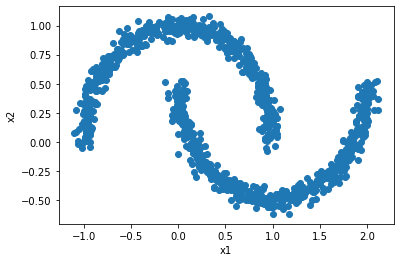

In [ ]:
#-------------------------------------------------------------------------------
# importamos función para crear datos-------------------------------------------
from sklearn.datasets import make_moons
#-------------------------------------------------------------------------------
# creamos los datos-------------------------------------------------------------
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
#-------------------------------------------------------------------------------
print('Dimensión de datos:', X.shape, y.shape)
plt.scatter(X[:,0],X[:,1])#,c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
#-------------------------------------------------------------------------------

In [ ]:
#-------------------------------------------------------------------------------
# importamos la función DBSCAN--------------------------------------------------
from sklearn.cluster import DBSCAN
#-------------------------------------------------------------------------------
# generamos el modelo ----------------------------------------------------------
dbscan = DBSCAN(eps=0.05, min_samples=5)
#-------------------------------------------------------------------------------
# aplicamos el modelo a los datos-----------------------------------------------
dbscan.fit(X)
#-------------------------------------------------------------------------------

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

Las etiquetas de todas las instancias ahora están disponibles en la variable *labels_ instance*:

In [ ]:
#-------------------------------------------------------------------------------
# etiquetas asignadas por el DBSCAN---------------------------------------------
dbscan.labels_[:20]
#-------------------------------------------------------------------------------

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
        2,  2,  4])

Tenga en cuenta que algunas instancias tienen un índice de clúster igual a **-1**: esto significa que **el algoritmo las considera anomalías**. Los índices de las instancias centrales están disponibles en la variable de instancia *core_sample_indices_*, y las propias instancias centrales están disponibles en la variable *components_ instance*:

In [ ]:
#-------------------------------------------------------------------------------
print('Número de instancias centrales:', len(dbscan.core_sample_indices_))
#-------------------------------------------------------------------------------

Número de instancias centrales: 808


In [ ]:
print('Indices de las instancias centrales:',dbscan.core_sample_indices_)

Indices de las instancias centrales: [  0   4   5   6   7   8  10  11  12  13  14  16  17  18  19  20  21  22
  23  24  25  26  28  29  30  31  32  33  34  36  38  39  41  42  44  45
  47  49  50  51  52  53  54  55  56  58  59  61  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  83  84  85  87  88
  89  90  91  93  94  96  97  98 102 103 104 105 106 107 108 109 110 113
 114 115 116 117 119 120 122 123 124 125 126 127 128 129 130 135 136 139
 140 141 143 144 145 146 147 148 149 150 152 153 154 155 156 157 158 159
 161 162 163 164 165 166 167 168 169 170 172 173 174 175 176 177 178 179
 181 182 183 185 186 187 188 189 191 193 194 195 196 198 199 200 201 202
 203 204 205 206 207 209 210 211 212 213 214 215 216 217 218 219 221 222
 223 224 226 228 229 230 232 233 234 235 236 238 239 240 241 242 243 245
 246 247 248 249 250 251 252 253 255 256 257 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 276 277 278 279 280 281 282 283 284 285
 287 288 289 2

In [ ]:
#-------------------------------------------------------------------------------
# primeras 3 instancias centrales-----------------------------------------------
dbscan.components_[:3]
#-------------------------------------------------------------------------------

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [ ]:
#-------------------------------------------------------------------------------
# total de grupos identificados por DBSCAN--------------------------------------
print('Grupos:')
np.unique(dbscan.labels_)
#-------------------------------------------------------------------------------

Grupos:


array([-1,  0,  1,  2,  3,  4,  5,  6])

Generamos un nuevo modelo DBSCAN

In [ ]:
#-------------------------------------------------------------------------------
# cambiamos eps a 0.2 y no ingresamo el min_samples-----------------------------
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)
#-------------------------------------------------------------------------------

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
#-------------------------------------------------------------------------------
# función para graficar grupos del DBSCAN---------------------------------------
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)
#-------------------------------------------------------------------------------

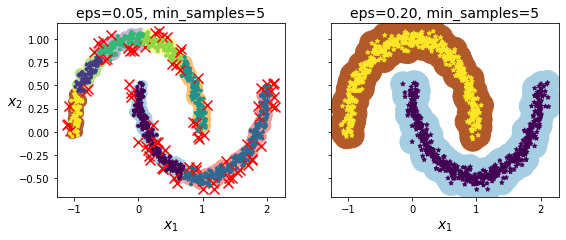

In [ ]:
#-------------------------------------------------------------------------------
# importamos módulo de soporte gráfico------------------------------------------
import matplotlib.pyplot as plt
#-------------------------------------------------------------------------------
plt.figure(figsize=(9, 3.2))
#-------------------------------------------------------------------------------
plt.subplot(121)
plot_dbscan(dbscan, X, size=100)
#-------------------------------------------------------------------------------
plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)
#-------------------------------------------------------------------------------
#save_fig("dbscan_plot")
plt.show()
#-------------------------------------------------------------------------------

Este agrupamiento se representa en la gráfica izquierda de la figura. 
- Como podemos ver, el algoritmo identificó bastantes anomalías, además de 7 grupos diferentes. **¡Que decepcionante!**.

Afortunadamente, si **ampliamos el vecindario de cada instancia** al aumentar $\epsilon$ a 0.2, obtenemos el agrupamiento a la derecha, que se ve perfecto. Continuemos con este modelo.

Sorprendentemente, la clase **DBSCAN** no tiene un método *predict_()*, aunque tiene un método *fit_predict_()*. En otras palabras, no puede predecir a qué clúster pertenece una nueva instancia. La razón de esta decisión es que varios algoritmos de clasificación podrían tener sentido aquí, y es bastante fácil entrenar uno, por ejemplo, un clasificador K-NN:

In [ ]:
#-------------------------------------------------------------------------------
dbscan = dbscan2
#-------------------------------------------------------------------------------

In [ ]:
#-------------------------------------------------------------------------------
# importamos función de clasificador tipo KNN
from sklearn.neighbors import KNeighborsClassifier
#-------------------------------------------------------------------------------
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
#-------------------------------------------------------------------------------

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

- Ahora, dadas algunas instancias nuevas, **podemos predecir a qué grupo probablemente pertenecerán**, e incluso **estimar una probabilidad para cada grupo**. 
- Tengamos en cuenta que solo los entrenamos en las instancias centrales, pero también podríamos haber optado por capacitarlos en **todas las instancias**, o **todas menos las anomalías**: esta elección depende de la tarea final.

In [ ]:
#-------------------------------------------------------------------------------
# establecemos un nuevo grupo de muestras---------------------------------------
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)
#-------------------------------------------------------------------------------

array([1, 0, 1, 0])

In [ ]:
#-------------------------------------------------------------------------------
# extraemos las probabilidades de pertenecia a cada grupo-----------------------
knn.predict_proba(X_new)
#-------------------------------------------------------------------------------

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

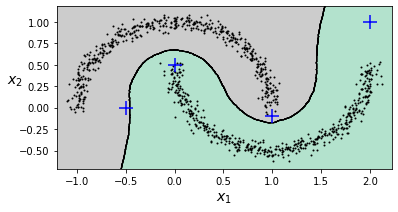

In [ ]:
#-------------------------------------------------------------------------------
# graficamos los vecindarios de decisión----------------------------------------
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
#save_fig("cluster_classification_plot")
plt.show()
#-------------------------------------------------------------------------------

# Otros algoritmos de clustering

# Spectral clustering

In [ ]:
#-------------------------------------------------------------------------------
from sklearn.cluster import SpectralClustering
#-------------------------------------------------------------------------------
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)
#-------------------------------------------------------------------------------

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=100,
                   kernel_params=None, n_clusters=2, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=42)

In [ ]:
#-------------------------------------------------------------------------------
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)
#-------------------------------------------------------------------------------

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1,
                   kernel_params=None, n_clusters=2, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=42)

In [ ]:
#-------------------------------------------------------------------------------
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)
#-------------------------------------------------------------------------------

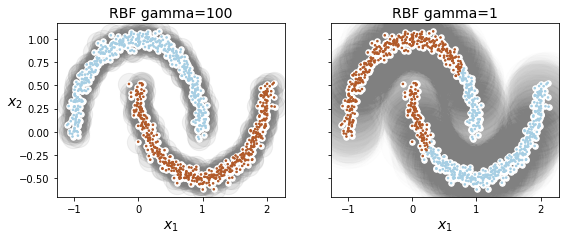

In [ ]:
#-------------------------------------------------------------------------------
plt.figure(figsize=(9, 3.2))
plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)
plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)
plt.show()
#-------------------------------------------------------------------------------